# Dagster Pipeline Example: Bitcoin Data Ingestion

This notebook demonstrates how to use a Dagster pipeline to fetch, transform, store, and analyze real-time Bitcoin price data using the CoinGecko API.

For a detailed explanation of the API utilities used in this notebook, refer to: [`bitcoin_dagster.API.md`](./bitcoin_dagster.API.md)

All logic is imported from `bitcoin_dagster_utils.py.

This notebook assumes you've defined a Dagster pipeline and are running dagit at http://localhost:3000

# Why Dagster?

- **Modular & Scalable**: Dagster structures your pipeline into reusable `@op`s and `job`s, making it easy to develop, debug, and extend.
  
- **Built-in Scheduling**: Run your Bitcoin data pipeline automatically at regular intervals using `ScheduleDefinition` — no cron jobs needed.

- **Visual Monitoring**: Dagster provides a powerful web UI (Dagit) to view pipeline runs, logs, and step-by-step execution details.

- **Resilient Execution**: Handles retries, error boundaries, and exceptions gracefully — essential for real-time ingestion from APIs.

- **Easy Integration**: Works seamlessly with APIs (like CoinGecko), data storage (CSV/SQLite), and analysis libraries (Pandas, Matplotlib).


## Setup and Imports

### 1. Importing Dependencies

We begin by importing necessary packages and the utility functions defined in Dagster_utils.

In [18]:
from Dagster_utils import (
    fetch_bitcoin_price,
    process_price_data,
    save_to_csv,
    get_historical_bitcoin_data,
    calculate_moving_average,
    detect_trend,
    detect_anomalies_zscore,
    plot_price_with_moving_average
)

import pandas as pd
import matplotlib.pyplot as plt

### 2. Fetch Real-time Bitcoin Price

In [19]:
# Fetch current price from CoinGecko
price_data = fetch_bitcoin_price()
df_live = process_price_data(price_data)

print("📌 Current Bitcoin Price:")
print(df_live)

📌 Current Bitcoin Price:
                   timestamp  price
0 2025-05-01 20:12:55.550383  96525


### 3. Save Real-time Price to CSV

In [20]:
# Save current data point to local CSV
save_to_csv(df_live, filepath="bitcoin_prices.csv")

print("Data saved to bitcoin_prices.csv")

Data saved to bitcoin_prices.csv


###  4. Load Historical Price Data

In [21]:
# Load last 180 days of Bitcoin historical data
df_hist = get_historical_bitcoin_data(days=180)
df_hist.head()

,date,price
0,2024-11-04,68803.506263
1,2024-11-05,67793.297827
2,2024-11-06,69335.425531
3,2024-11-07,75620.886070
4,2024-11-08,75987.241783


### 5. Calculate Moving Average

In [22]:
# Calculate moving average (5-day default)
df_ma = calculate_moving_average(df_hist, window_days=5)
df_ma.head()

,date,price,moving_average
0,2024-11-04,68803.506263,68803.506263
1,2024-11-05,67793.297827,68298.402045
2,2024-11-06,69335.425531,68644.076540
3,2024-11-07,75620.886070,70388.278923
4,2024-11-08,75987.241783,71508.071495


### 6. Detect trends and anomolies

In [27]:
trend = detect_trend(df_ma)
print(f"📈 Detected trend: {trend}")

df_anom = detect_anomalies_zscore(df_ma)
df_anom[df_anom["anomaly"] == True].head()

📈 Detected trend: downward


,date,price,moving_average,z_score,anomaly
0,2024-11-04,68803.506263,68803.506263,-2.919908,True
1,2024-11-05,67793.297827,68298.402045,-3.045722,True
2,2024-11-06,69335.425531,68644.076540,-2.853662,True


### 7.  Plot Price with Moving Average

KeyError: 'moving_avg'

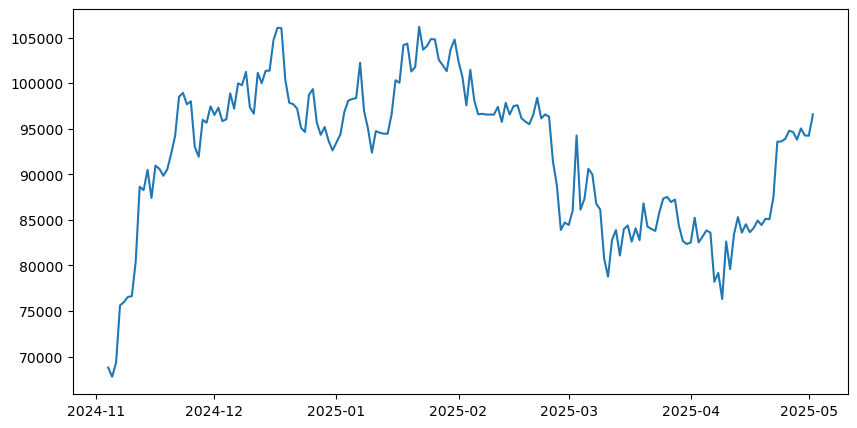

In [26]:
# Plot Bitcoin price + moving average overlay
plot_price_with_moving_average(df_ma)